<a href="https://colab.research.google.com/github/dgambone3/CSC_6850-MachineLearning-AssignmentThree/blob/main/Gambone_Assignment3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assigment 3 - (400/450 points)

**Total points (400 undergraduate / 450 graduate)**

**Student Name: Diana Gambone**

**<ins>*Graduate*</ins>** / Undergraduate (select one)

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 (for the folds use: 3456, 5678, 7890) for your randomseed/random states. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment3.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 20 extra credit points by doing one simple thing:

1) Make sure your repo for this assignment has a nice README file with figures and results. 


In [3]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit


Using the Chess dataset from Kaggle: https://www.kaggle.com/datasets/datasnaek/chess

In [4]:
### Manually download it and upload to this istance data sample space
### Note DO NOT change these operations or all your answers will be incorrect

### Let's do some transformations and extra features on this.
df=pd.read_csv('games.csv', encoding='utf-8')

# Difference between white rating and black rating - independent variable
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) - dependent (target) variable
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For this assignment we will be using two columns as features only, and the white_win colum as the label.

In [6]:
X=df[['rating_difference', 'turns']]
y=df['white_win'].values

# Question 1 (10 points)

Use sklearn to split this the data into testing and training data. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

# Question 2 (30 points)

Manually (DO NOT use kFold or any built-in functionality) create **THREE** different folds for the training data. 

In [8]:
# 23456, 5678, 7890
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=3456)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=5678)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=7890)

X_train1.reset_index(inplace=True, drop=True)
X_test1.reset_index(inplace=True, drop=True)

X_train2.reset_index(inplace=True, drop=True)
X_test2.reset_index(inplace=True, drop=True)

X_train3.reset_index(inplace=True, drop=True)
X_test3.reset_index(inplace=True, drop=True)


# Question 3 (30 points)

Create code to build three different SVM models with the following kernels:

1.   linear
2.   poly
3.   rbf

In [9]:
linear = SVC(kernel='linear')
linear = make_pipeline(StandardScaler(), linear)

poly = SVC(kernel='poly')
rbf = SVC(kernel='rbf')
models = [linear, poly, rbf]

titles = ['Linear', 'Poly', 'RBF']
splits = pd.DataFrame(columns=titles)

# Question 4 (70 points)

FOLD 1 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 



    Linear Classification Metrics and Confusion Matrix for Split 1
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1559
           1       0.66      0.62      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210



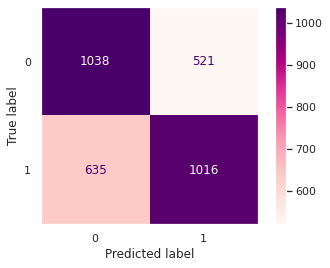

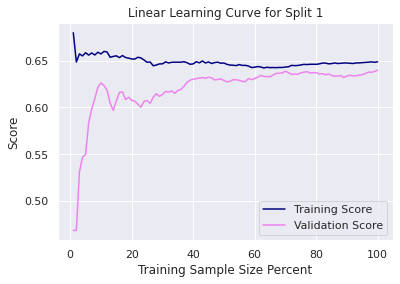



    Poly Classification Metrics and Confusion Matrix for Split 1
              precision    recall  f1-score   support

           0       0.73      0.26      0.38      1559
           1       0.57      0.91      0.70      1651

    accuracy                           0.59      3210
   macro avg       0.65      0.59      0.54      3210
weighted avg       0.65      0.59      0.55      3210



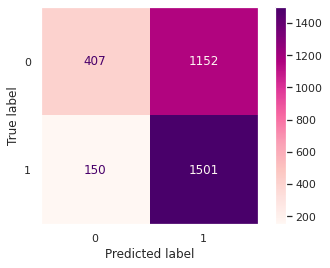

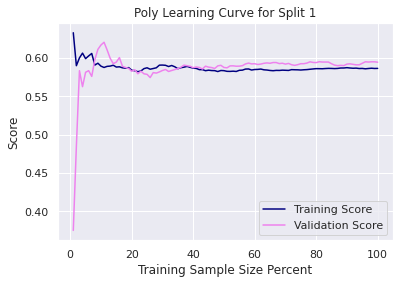



    RBF Classification Metrics and Confusion Matrix for Split 1
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1559
           1       0.66      0.63      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210



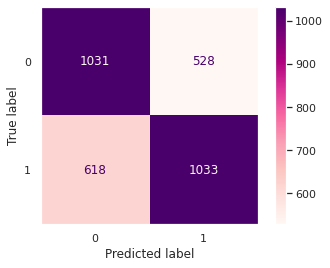

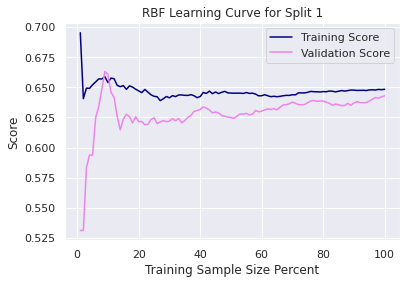

In [10]:
def fit_models(model, Xx_train, yy_train, Xx_test, yy_test):
  fit_mod = model.fit(Xx_train, yy_train)
  pred = fit_mod.predict(Xx_test)
  print(classification_report(yy_test, pred)) #classification report

  matrix = confusion_matrix(y_true=yy_test, y_pred=pred)
  disp = metrics.ConfusionMatrixDisplay(matrix)
  disp.plot(cmap='RdPu') #change color
  plt.grid(False) #remove grid lines
  plt.show() # show confusion matrix
  return fit_mod #return fit model

def get_learning_curve(model, X, y):
  scores=[]
  perc=[]
  for n in range(1,101):
    perc.append(n)
    XX = X.iloc[0:int(len(X) * (n/100))] #df
    yy = y[0:int(len(y) * (n/100))] #list
    pred = model.predict(XX)
    score = accuracy_score(y_true=yy, y_pred=pred)
    scores.append(score)
  return pd.DataFrame({'percent':perc, 'scores':scores})

def get_plot(train_scores, test_scores):
  plt.plot(train_scores['percent'], train_scores['scores'], label='Training Score', color='navy')
  plt.plot(test_scores['percent'], test_scores['scores'], label='Validation Score', color='violet')
  plt.xlabel('Training Sample Size Percent')
  plt.ylabel('Score')
  plt.legend()
  return plt




i = 0
for model in models:
  print(f'\n\n    {titles[i]} Classification Metrics and Confusion Matrix for Split 1')
  fitted = fit_models(model, X_train1, y_train1, X_test1, y_test1)
  splits.at[0, titles[i]] = fitted

  train_scores = get_learning_curve(model, X_train1, y_train1)
  test_scores = get_learning_curve(model, X_test1, y_test1)
  
  plt = get_plot(train_scores, test_scores)
  plt.title(f'{titles[i]} Learning Curve for Split 1')  
  plt.show()
  i += 1

The linear model has high over all accuracy and high F1-Score. The learning curve shows that the model perform better and with less variance when a higher percentage of the sample data is used. The model tends to overfit until about 80% of the data is used, and appears to generalize best when 100% of the data is used. 

The polynomial model has lower F1-Score for the classifier 0, but the lowest score for the 1 classifier. The learning curves cross at about 30% data, when the validation set performs better than the training, but the model generalizes well when about 60% of the data is used.

The RBF model has average F1-Score values and accuracy as compared to the other models. The model mispredicts true values more than false values as shown in the confusion matrix. Based on the learning curve, the model overfits when less data is used, and generalizes very well when about 85% or 100% of the data is used.

# Question 5 (70 points)

FOLD 2 - run the first three models with second fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 



    Linear Classification Metrics and Confusion Matrix for Split 2
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1626
           1       0.66      0.64      0.65      1584

    accuracy                           0.66      3210
   macro avg       0.66      0.66      0.66      3210
weighted avg       0.66      0.66      0.66      3210



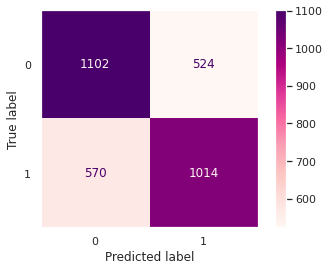

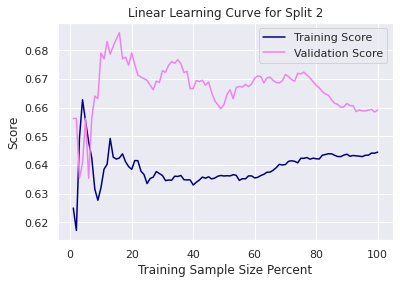



    Poly Classification Metrics and Confusion Matrix for Split 2
              precision    recall  f1-score   support

           0       0.78      0.24      0.37      1626
           1       0.54      0.93      0.69      1584

    accuracy                           0.58      3210
   macro avg       0.66      0.58      0.53      3210
weighted avg       0.66      0.58      0.52      3210



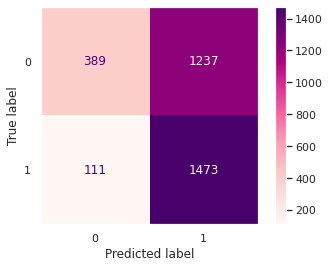

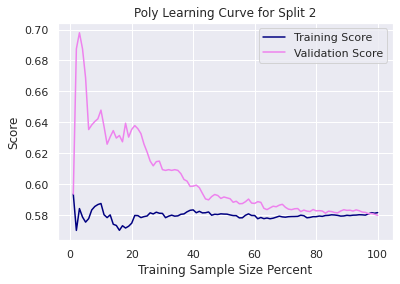



    RBF Classification Metrics and Confusion Matrix for Split 2
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      1626
           1       0.66      0.64      0.65      1584

    accuracy                           0.66      3210
   macro avg       0.66      0.66      0.66      3210
weighted avg       0.66      0.66      0.66      3210



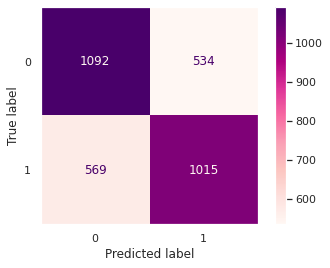

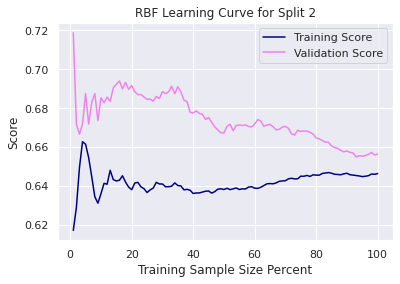

In [16]:
i = 0
for model in models:
  print(f'\n\n    {titles[i]} Classification Metrics and Confusion Matrix for Split 2')
  fitted = fit_models(model, X_train2, y_train2, X_test2, y_test2)
  splits.at[1, titles[i]] = fitted
  # print(splits)

  train_scores = get_learning_curve(model, X_train2, y_train2)
  test_scores = get_learning_curve(model, X_test2, y_test2)
  
  plt = get_plot(train_scores, test_scores)
  plt.title(f'{titles[i]} Learning Curve for Split 2')  
  plt.show()
  i += 1

The linear model's confusion matrix shows that it performs well in correctly predicting each category. The learning curve shows that the model doesn't generalize too well at any point, and overfits. 

The polynomial model has low F1-Score for 0 classifier, and high F1-Score for the 1 classifier. This is also reflected in the confusion matrix, which futher shows that the model more often predicts a classifier of 1. The learning curves for this model generalizes better as more data is used, and best when the two curves cross when about 97% of the data is used. 

The RBF model has relatively average F1-Scores. The learning curve for this model tends to overfit less as more data is used, and will generalize best when about 95% of the data is used.

# Question 6 (70 points)

FOLD 3 - run the first three models with third fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 



    Linear Classification Metrics and Confusion Matrix for Split 3
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1613
           1       0.64      0.61      0.62      1597

    accuracy                           0.63      3210
   macro avg       0.63      0.63      0.63      3210
weighted avg       0.63      0.63      0.63      3210



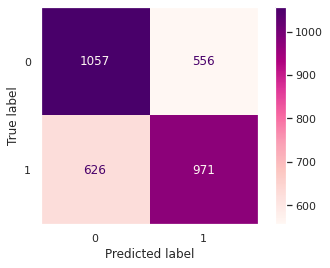

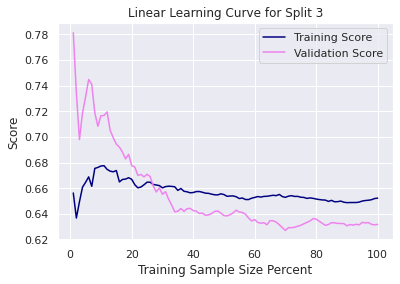



    Poly Classification Metrics and Confusion Matrix for Split 3
              precision    recall  f1-score   support

           0       0.72      0.24      0.36      1613
           1       0.54      0.91      0.68      1597

    accuracy                           0.57      3210
   macro avg       0.63      0.57      0.52      3210
weighted avg       0.63      0.57      0.52      3210



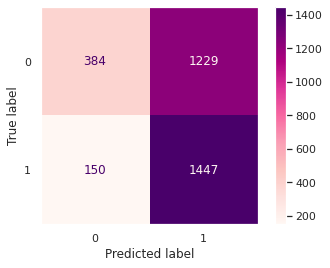

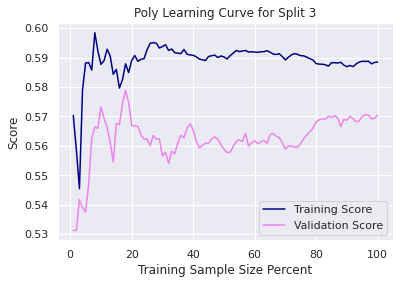



    RBF Classification Metrics and Confusion Matrix for Split 3
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1613
           1       0.63      0.61      0.62      1597

    accuracy                           0.63      3210
   macro avg       0.63      0.63      0.63      3210
weighted avg       0.63      0.63      0.63      3210



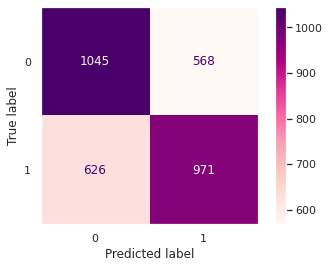

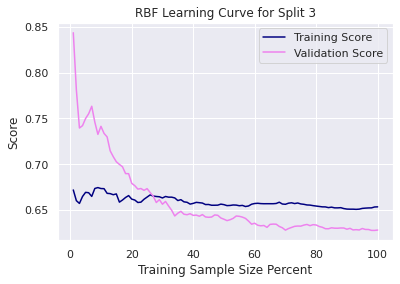

In [12]:
i = 0
for model in models:
  print(f'\n\n    {titles[i]} Classification Metrics and Confusion Matrix for Split 3')
  fitted = fit_models(model, X_train3, y_train3, X_test3, y_test3)
  splits.at[2, titles[i]] = fitted

  train_scores = get_learning_curve(model, X_train3, y_train3)
  test_scores = get_learning_curve(model, X_test3, y_test3)
  
  plt = get_plot(train_scores, test_scores)
  plt.title(f'{titles[i]} Learning Curve for Split 3')  
  plt.show()
  i += 1

The linear classification report shows that this model has relatively average F1-Scores, acuracy, precision and recall. The learning curve shows that the model tends to perform better on the training set. The curves intersect at about 25%, and then begin to overfit until it reaches about 80% data when it generalizes best. 

The polynomial model has the worst F1-Score and recall for the 0 classifier, but one of the better F1-Scores for the 1 clasifier. Shown in the confision matrix, the model often overpredicts classifier 1, and less often classifies as 0. This reflects the high recall for classifier 1, as there is a large ratio of true positives to all predicted positives. The learning curve shows that the model overfits until about 75% when the curves start to converge, and then generalizes best at 100% sample size.

The RBF model has relatively average scores for all metrics. The learning curve shows that the model generalizes best around 70%, where before that point the model slightly overfits. The RBF model is nearly identical to the linear model for this split, but the RBF model generalizes slightly better with more data than the linear model. 

# Question 7 (30 points)

From the three folds pick the best model for each different type of kernel.

Present a table with the following columns from their metrics and model. Remember to make classifications on the test set at this stage.

1. Model Name (Kernel)
2. Accuracy
3. Precision
4. Recall
5. F1-score
6. RMSE


In [21]:
def get_scores(y_test, y_pred, kernel):

  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred)
  rmse = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

  r = [kernel, accuracy, precision, recall, f1_score, rmse]

  return r



best_mods = pd.DataFrame(columns=['kernel', 'accuracy', 'precision', 'recall', 'f1-score', 'rmse'])
#linear for split 1
s1_pred = splits.at[0, 'Linear'].predict(X_test1)
best1 = get_scores(y_test1, s1_pred, titles[0])
best_mods.loc[len(best_mods)] = best1

#linear for split 2
s2_pred = splits.at[1,'Linear'].predict(X_test2)
best2 = get_scores(y_test2, s2_pred, titles[0])
best_mods.loc[len(best_mods)] = best2

#rbf for split 3
s3_pred = splits.at[2,'RBF'].predict(X_test3)
best3 = get_scores(y_test3, s3_pred, titles[2])
best_mods.loc[len(best_mods)] = best3

best_mods

,kernel,accuracy,precision,recall,f1-score,rmse
0,Linear,0.639875,0.661028,0.615385,0.637390,0.360125
1,Linear,0.659190,0.663989,0.626263,0.644574,0.340810
2,RBF,0.628972,0.635153,0.597370,0.615682,0.371028


# Question 8 (40 points) 

From question 7, which one is the best model in the following contexts:

a) Metrics from table from question 7, and why?

b) Based on the learning curves ploted in the previous questions, and why?

Based on the metrics table from question 7, the best model would be the linear kernel on state 5678. This has similar results as the linear kernel for state 3456, but with slightly higher f1-score, recall and accuracy. The RBF kernel has the lowest overall metrics of all three models, so would not be the best option of the three. 

Based on the learning curves, the best plot is a linear model with random state on fold 1. This model shows it generalizes best while utilizing most of the data, and doesn't overfit as more data is used. 

# Question 9 (50 points)

Write the simplest and most efficient Sklearn pipeline to do extactly what we did in questions 2 to 6. Make sure that you get all the same intermediate outputs and output the same table from quetsion 7 directly from this pipeline.



    Linear Classification Metrics and Confusion Matrix for State 3456 
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1559
           1       0.66      0.62      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210



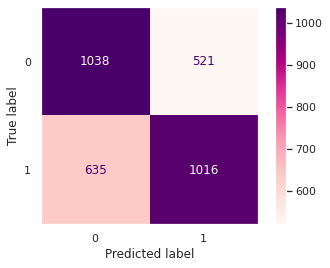

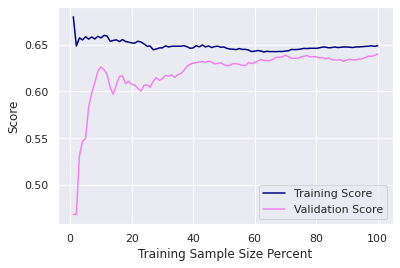



    Poly Classification Metrics and Confusion Matrix for State 3456 
              precision    recall  f1-score   support

           0       0.73      0.26      0.38      1559
           1       0.57      0.91      0.70      1651

    accuracy                           0.59      3210
   macro avg       0.65      0.59      0.54      3210
weighted avg       0.65      0.59      0.55      3210



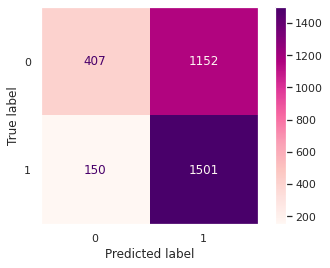

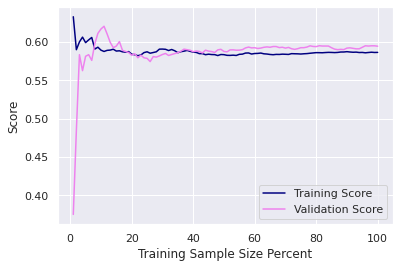



    RBF Classification Metrics and Confusion Matrix for State 3456 
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1559
           1       0.66      0.63      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210



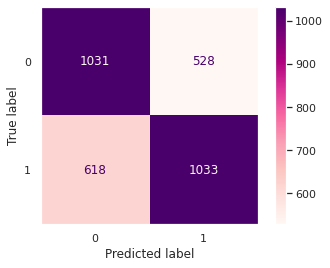

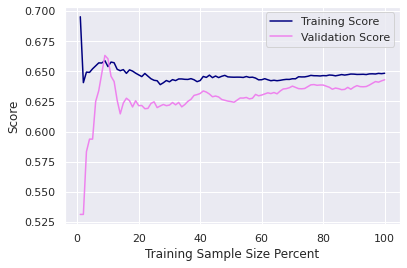



    Linear Classification Metrics and Confusion Matrix for State 5678 
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1559
           1       0.66      0.62      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210



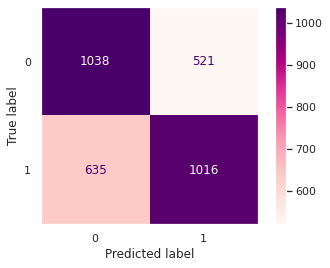

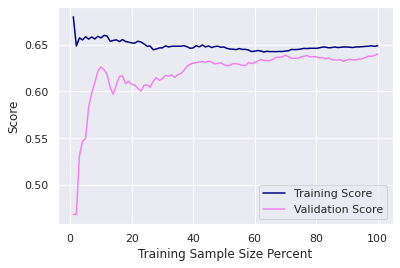



    Poly Classification Metrics and Confusion Matrix for State 5678 
              precision    recall  f1-score   support

           0       0.73      0.26      0.38      1559
           1       0.57      0.91      0.70      1651

    accuracy                           0.59      3210
   macro avg       0.65      0.59      0.54      3210
weighted avg       0.65      0.59      0.55      3210



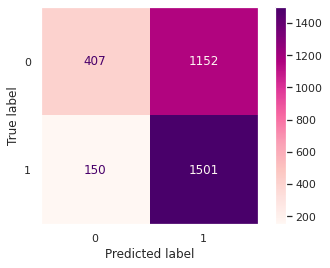

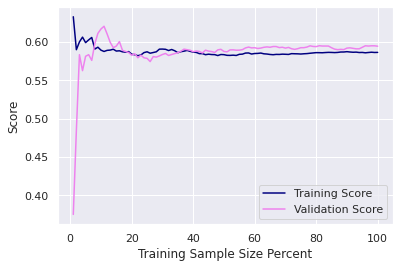



    RBF Classification Metrics and Confusion Matrix for State 5678 
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1559
           1       0.66      0.63      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210



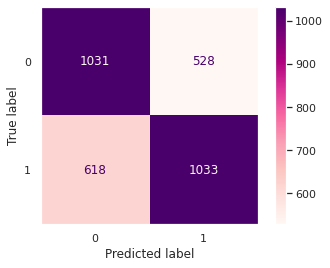

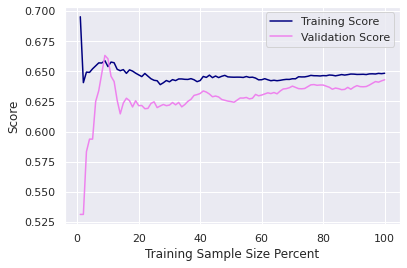



    Linear Classification Metrics and Confusion Matrix for State 7890 
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1559
           1       0.66      0.62      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210



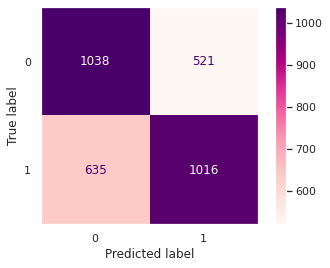

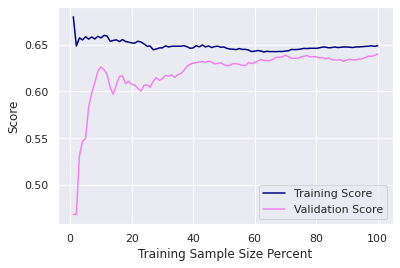



    Poly Classification Metrics and Confusion Matrix for State 7890 
              precision    recall  f1-score   support

           0       0.73      0.26      0.38      1559
           1       0.57      0.91      0.70      1651

    accuracy                           0.59      3210
   macro avg       0.65      0.59      0.54      3210
weighted avg       0.65      0.59      0.55      3210



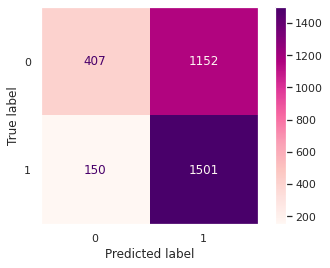

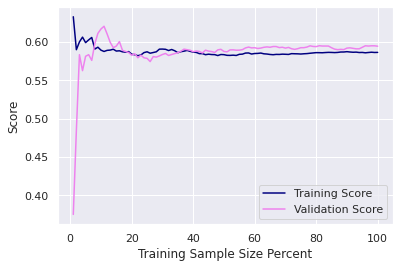



    RBF Classification Metrics and Confusion Matrix for State 7890 
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1559
           1       0.66      0.63      0.64      1651

    accuracy                           0.64      3210
   macro avg       0.64      0.64      0.64      3210
weighted avg       0.64      0.64      0.64      3210



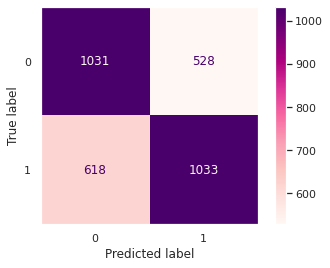

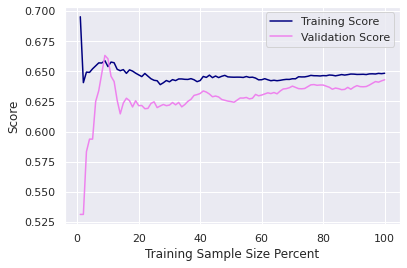

,random_state,kernel,accuracy,precision,recall,f1-score,rmse
0,NaN,SVC(),0.641433,0.657431,0.632344,0.644643,0.358567
1,NaN,SVC(),0.656075,0.651899,0.650253,0.651075,0.343925
2,NaN,SVC(kernel='linear'),0.631776,0.635887,0.608015,0.621639,0.368224


In [20]:
def best_model(X, y, states=[3456, 5678, 7890], kernels=['linear', 'poly', 'rbf']):
    
    results_df = pd.DataFrame(columns=['random_state', 'kernel', 'accuracy', 'precision', 'recall', 'f1-score', 'rmse'])
    
    # first split on original data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)
    i = 0
    # for each random state / fold
    for state in states:
        
        # split into another 80/20 set
        XX_train, XX_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size=0.2, random_state=state)
        
        # get metrics and confusion matrix
        j = 0
        for model in models:
          print(f'\n\n    {titles[j]} Classification Metrics and Confusion Matrix for State {state} ')
          fitted = fit_models(model, X_train1, y_train1, X_test1, y_test1)

          train_scores = get_learning_curve(model, X_train1, y_train1)
          test_scores = get_learning_curve(model, X_test1, y_test1)
          
          plt = get_plot(train_scores, test_scores)
          plt.show()
          j += 1


        param_grid = [{'kernel':['linear']},
                      {'kernel':['rbf']}, 
                      {'kernel':['poly']}]
        
        scaler = StandardScaler().fit(XX_train)
        
        # transform the training and validation data using the scaler
        XX_train_scaled = scaler.transform(XX_train)
        XX_scaled = scaler.transform(XX_test)
        
        grid_search = GridSearchCV(SVC(), param_grid=param_grid)
        
        grid_search.fit(XX_train_scaled, yy_train)
        
        # predict on test with the best estimator found in grid search
        y_pred = grid_search.best_estimator_.predict(XX_scaled)
        best = grid_search.best_estimator_
        
        # calculate evaluation metrics y_test, y_pred, kernel
        get_scores(yy_test, y_pred, best)
        accuracy = metrics.accuracy_score(yy_test, y_pred)
        precision = metrics.precision_score(yy_test, y_pred)
        recall = metrics.recall_score(yy_test, y_pred)
        f1_score = metrics.f1_score(yy_test, y_pred)
        rmse = metrics.mean_squared_error(yy_test, y_pred)
        r = [accuracy, precision, recall, f1_score, rmse]
        
        # add results to dataframe
        results_df = pd.concat([results_df, pd.DataFrame({'kernel': best, 
                                                          'accuracy': [accuracy], 'precision': [precision], 
                                                          'recall': [recall], 'f1-score': [f1_score], 'rmse':[rmse]})], 
                                                          ignore_index=True)
        # print(results_df)
        i+=1
    return results_df


best_model(X, y)

# Graduate Student Question: (50 points)

Use the following function and provide visualizations for the best models for each kernel type from above (looking for three plots to receive full credit). Note: The function might need some small adjustments :)


In [22]:
def Plot_3D(X, X_test, y_test, clf):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    
    mesh_size = 5
    margin = 1

    # create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # create a 3D scatter plot with predictions
    fig = ax.scatter(X_test['rating_difference'], 
                     X_test['turns'], 
                     y_test, 
                     alpha=0.8, 
                     color='black')
    # set labels
    ax.set_xlabel('Rating Difference')
    ax.set_ylabel('Turns')
    ax.set_zlabel('Prediction')

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # set figure title
    ax.set_title("Scatter 3D Plot with SVM Prediction Surface")

    # add prediction plane
    ax.plot_surface(xx, yy, Z, cmap='RdBu', alpha=0.5)
    plt.show()

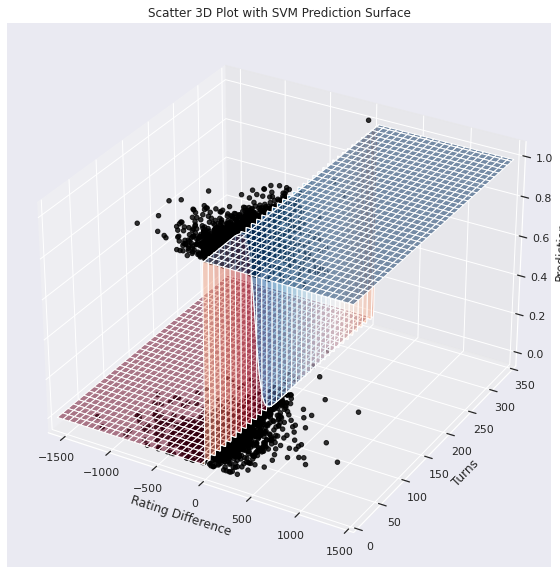

In [23]:
lin = SVC(kernel='linear', probability=True)
scale = StandardScaler().fit(X_test1)
XX_scaled = scale.transform(X_test1)

lin.fit(XX_scaled, y_test1)
Plot_3D(X_train, X_test1, y_test1, lin)

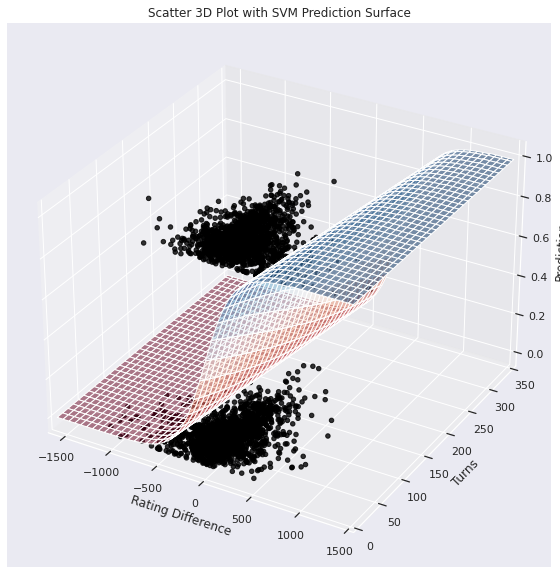

In [24]:
lin.fit(XX_scaled, y_test2)
Plot_3D(X_train, X_test2, y_test2, lin)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


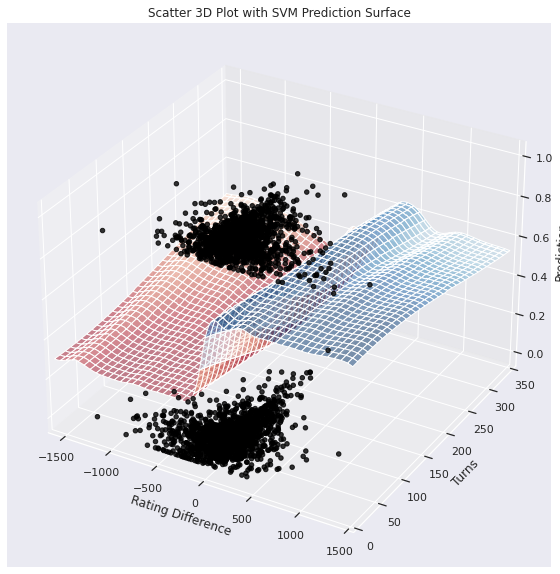

In [25]:
p = SVC(kernel='rbf', probability=True)
p.fit(X_train3, y_train3)
Plot_3D(X_train, X_test3, y_test3, p)